In [54]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Crawling data using BeautifulSoup package

In [55]:
players=[]
for year in range(1980,2022):
    url = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'.format(year)
    
    r = requests.get(url)
    r_html = r.text
    soup = BeautifulSoup(r_html,'html.parser')

    table=soup.find_all(class_="full_table")
    
    """ Extracting List of column names"""
    head=soup.find(class_="thead")
    column_names_raw=[head.text for item in head][0]
    column_names_polished=column_names_raw.replace("\n",",").split(",")[2:-1]
    column_names_polished.insert(0, 'year')
    """Extracting full list of player_data"""
        
    for i in range(len(table)):
        
        player_=[year]        
        for td in table[i].find_all("td"):
            player_.append(td.text)


        players.append(player_)


In [56]:
df1=pd.DataFrame(players, columns=column_names_polished)
#cleaning the player's name from occasional special characters
df1['Player']=df1['Player'].replace('*', '')
df1.head(10)


,year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Kareem Abdul-Jabbar*,C,32,LAL,82,,38.3,10.2,16.9,...,.765,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8
1,1980,Tom Abernethy,PF,25,GSW,67,,18.2,2.3,4.7,...,.683,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4
2,1980,Alvan Adams,C,25,PHO,75,,28.9,6.2,11.7,...,.797,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9
3,1980,Tiny Archibald*,PG,31,BOS,80,80,35.8,4.8,9.9,...,.830,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1
4,1980,Dennis Awtrey,C,31,CHI,26,,21.5,1.0,2.3,...,.640,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3
5,1980,Gus Bailey,SG,28,WSB,20,,9.0,0.8,1.8,...,.385,0.3,1.1,1.4,1.3,0.4,0.2,0.6,0.9,1.9
6,1980,James Bailey,PF,22,SEA,67,,10.8,1.8,4.0,...,.673,1.1,1.9,2.9,0.4,0.3,0.8,1.2,1.7,4.7
7,1980,Greg Ballard,SF,25,WSB,82,,29.7,6.6,13.4,...,.753,2.9,4.9,7.8,1.9,1.1,0.4,1.6,2.4,15.6
8,1980,Mike Bantom,SF,28,IND,77,,30.3,5.0,9.9,...,.665,2.5,3.4,5.9,3.6,1.1,0.6,2.5,3.5,11.8
9,1980,Marvin Barnes,PF,27,SDC,20,,14.4,1.2,3.0,...,.500,1.7,2.2,3.9,0.9,0.3,0.6,0.9,2.6,3.2


In [57]:
df1.shape

(17683, 30)

In [58]:
df1.to_csv('NBA.csv')

# Pre-processing

*Remove rows with missing values*

In [59]:
df = df1[df1 != '']
df = df.dropna()
df = df.reset_index(drop = True)
df.head(10)


,year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Tiny Archibald*,PG,31,BOS,80,80,35.8,4.8,9.9,...,.830,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1
1,1980,Henry Bibby,PG,30,PHI,82,8,24.8,3.1,7.6,...,.790,0.8,1.7,2.5,3.7,0.8,0.1,1.8,2.0,9.0
2,1980,Larry Bird*,PF,23,BOS,82,82,36.0,8.5,17.8,...,.836,2.6,7.8,10.4,4.5,1.7,0.6,3.2,3.4,21.3
3,1980,M.L. Carr,SF,29,BOS,82,7,24.3,4.4,9.3,...,.739,1.3,2.7,4.0,1.9,1.5,0.4,1.7,2.6,11.1
4,1980,Don Chaney,SG,33,BOS,60,0,8.7,1.1,3.2,...,.762,0.5,0.7,1.2,0.6,0.5,0.2,0.6,1.3,2.8
5,1980,Maurice Cheeks*,PG,23,PHI,79,79,33.2,4.5,8.4,...,.779,0.9,2.5,3.5,7.0,2.3,0.4,2.7,2.5,11.4
6,1980,Doug Collins,SG,28,PHI,36,17,26.8,5.3,11.4,...,.911,0.8,1.8,2.6,2.8,0.8,0.2,2.3,2.1,13.8
7,1980,Dave Cowens*,C,31,BOS,66,55,32.7,6.4,14.1,...,.779,1.9,6.2,8.1,3.1,1.0,0.9,1.6,3.3,14.2
8,1980,Darryl Dawkins,C,23,PHI,80,80,31.8,6.2,11.8,...,.653,2.5,6.2,8.7,1.9,0.6,1.8,2.9,4.1,14.7
9,1980,Julius Erving*,SF,29,PHI,78,78,36.1,10.7,20.7,...,.787,2.8,4.6,7.4,4.6,2.2,1.8,3.6,2.7,26.9


In [60]:
df.shape

(14301, 30)

*Convert type to float*

In [61]:
float_colname = ['G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']
df[float_colname] = df[float_colname].astype(float)

# EDA

*Number of teams and positions*

In [62]:
print('Number of teams:', len(df['Tm'].unique()))
print('Number of positions:', len(df['Pos'].unique()))

Number of teams: 41
Number of positions: 16


In [63]:
df.describe()

,year,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,14301.000000,14301.000000,14301.000000,14301.000000,14301.000000,14301.000000,14301.000000,14301.000000,14301.000000,14301.000000,...,14301.000000,14301.000000,14301.000000,14301.000000,14301.000000,14301.000000,14301.000000,14301.000000,14301.000000,14301.000000
mean,2003.385428,58.162716,29.116495,22.078260,3.515698,7.746801,0.442536,0.547899,1.581554,0.259179,...,0.741934,1.033515,2.680421,3.712663,2.180092,0.747165,0.412628,1.361737,1.996350,9.319530
std,11.478930,22.427356,29.980798,9.621785,2.259826,4.650659,0.067952,0.667103,1.746331,0.167024,...,0.123698,0.856679,1.799926,2.528378,1.930771,0.471741,0.488424,0.822177,0.808547,6.065372
min,1980.000000,1.000000,0.000000,2.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,44.000000,2.000000,14.200000,1.700000,4.000000,0.407000,0.000000,0.100000,0.154000,...,0.685000,0.400000,1.400000,1.900000,0.800000,0.400000,0.100000,0.700000,1.400000,4.500000
50%,2004.000000,65.000000,16.000000,21.800000,3.000000,6.700000,0.444000,0.300000,0.900000,0.306000,...,0.760000,0.800000,2.300000,3.100000,1.600000,0.700000,0.300000,1.200000,2.000000,7.900000
75%,2014.000000,77.000000,58.000000,30.300000,4.900000,10.700000,0.481000,0.900000,2.600000,0.366000,...,0.820000,1.400000,3.500000,4.900000,2.900000,1.000000,0.500000,1.800000,2.600000,12.900000
max,2021.000000,85.000000,83.000000,43.700000,13.400000,27.800000,0.769000,5.300000,13.200000,1.000000,...,1.000000,6.900000,12.300000,18.700000,14.500000,3.700000,5.000000,5.700000,5.000000,37.100000


In [64]:
df.shape

(14301, 30)

In [65]:
dfx = df.groupby('Tm').sum()
df10 = dfx.nlargest(10, 'PTS')
df10['PTS']

Tm
TOT    11526.3
LAL     4698.8
GSW     4527.0
HOU     4499.0
DEN     4470.6
PHI     4464.9
IND     4449.0
DAL     4445.8
BOS     4429.5
SAS     4419.1
Name: PTS, dtype: float64

## Top PTS by team

<AxesSubplot:xlabel='Tm'>

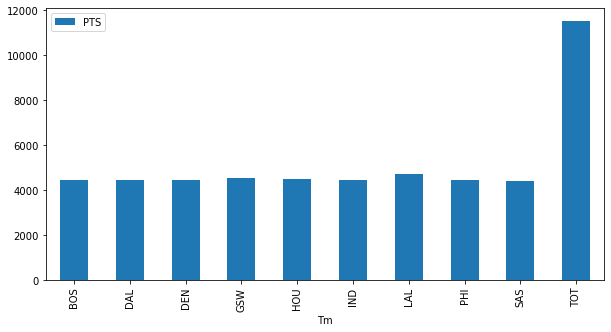

In [66]:
dfx = df.groupby('Tm').sum()
df10 = dfx.nlargest(10, 'PTS')
df10[['PTS']].groupby(['Tm']).sum().plot.bar(figsize=(10, 5))

## Top years that has the biggest amount of players

<AxesSubplot:xlabel='year'>

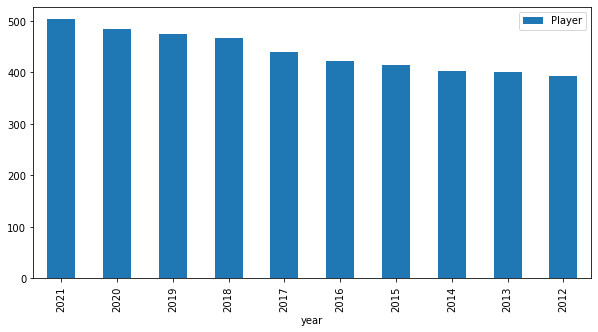

In [67]:
dfx = df.groupby('year').count()
dfx
df10 = dfx.nlargest(10, 'Player')
# df10['PTS']
df10.plot.bar(y = 'Player', figsize=(10, 5))

## Top PTS by Pos

<AxesSubplot:xlabel='Pos'>

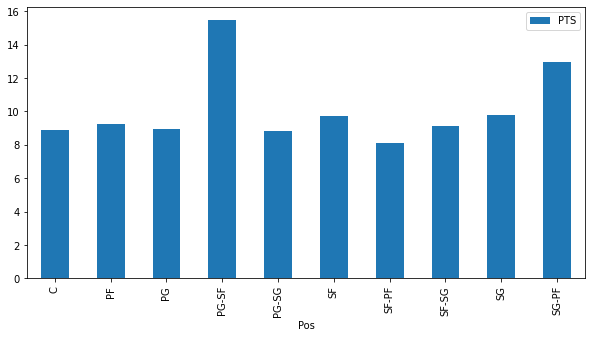

In [68]:
dfx = df.groupby('Pos').mean()
df10 = dfx.nlargest(10, 'PTS')
df10[['PTS']].groupby(['Pos']).sum().plot.bar(figsize=(10, 5))

*Remove string columns*

In [69]:
df_numerical = df.drop(['Pos', 'Tm'], axis = 1)
df_numerical.head()

,year,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Tiny Archibald*,31,80.0,80.0,35.8,4.8,9.9,0.482,0.1,...,0.830,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1
1,1980,Henry Bibby,30,82.0,8.0,24.8,3.1,7.6,0.401,0.1,...,0.790,0.8,1.7,2.5,3.7,0.8,0.1,1.8,2.0,9.0
2,1980,Larry Bird*,23,82.0,82.0,36.0,8.5,17.8,0.474,0.7,...,0.836,2.6,7.8,10.4,4.5,1.7,0.6,3.2,3.4,21.3
3,1980,M.L. Carr,29,82.0,7.0,24.3,4.4,9.3,0.474,0.1,...,0.739,1.3,2.7,4.0,1.9,1.5,0.4,1.7,2.6,11.1
4,1980,Don Chaney,33,60.0,0.0,8.7,1.1,3.2,0.354,0.0,...,0.762,0.5,0.7,1.2,0.6,0.5,0.2,0.6,1.3,2.8


In [70]:
df_numerical.shape

(14301, 28)

# Regression Models

## Correlation Analysis

In [71]:
# df2 =  df1[['rating', 'm_score', 'runtime', 'votes', 'gross']]
corr = df_numerical.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,year,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
year,1.00,-0.19,-0.08,-0.06,-0.09,-0.06,-0.12,0.40,0.42,0.24,-0.22,-0.24,0.08,0.14,-0.13,-0.15,0.02,-0.19,0.05,-0.03,-0.09,-0.13,-0.04,-0.18,-0.23,-0.06
G,-0.19,1.00,0.58,0.59,0.49,0.46,0.41,0.16,0.13,0.05,0.47,0.46,0.29,0.37,0.39,0.39,0.17,0.36,0.42,0.42,0.33,0.42,0.27,0.42,0.51,0.48
GS,-0.08,0.58,1.00,0.84,0.75,0.74,0.33,0.26,0.25,0.05,0.72,0.71,0.25,0.29,0.63,0.64,0.16,0.48,0.64,0.62,0.53,0.61,0.38,0.68,0.59,0.74
MP,-0.06,0.59,0.84,1.00,0.88,0.89,0.35,0.40,0.40,0.13,0.82,0.82,0.27,0.35,0.75,0.75,0.25,0.49,0.71,0.67,0.64,0.73,0.38,0.81,0.69,0.89
FG,-0.09,0.49,0.75,0.88,1.00,0.98,0.41,0.35,0.35,0.11,0.96,0.95,0.32,0.36,0.85,0.85,0.25,0.48,0.66,0.64,0.56,0.64,0.38,0.82,0.59,0.99
FGA,-0.06,0.46,0.74,0.89,0.98,1.00,0.28,0.43,0.44,0.15,0.91,0.93,0.21,0.27,0.84,0.82,0.28,0.40,0.62,0.58,0.60,0.66,0.31,0.83,0.56,0.98
FG%,-0.12,0.41,0.33,0.35,0.41,0.28,1.00,-0.13,-0.18,-0.06,0.48,0.38,0.84,0.85,0.31,0.35,-0.03,0.49,0.43,0.47,0.10,0.19,0.38,0.28,0.43,0.37
3P,0.40,0.16,0.26,0.40,0.35,0.43,-0.13,1.00,0.98,0.51,0.06,0.07,0.02,0.30,0.22,0.16,0.31,-0.26,0.10,-0.02,0.33,0.29,-0.14,0.23,0.02,0.42
3PA,0.42,0.13,0.25,0.40,0.35,0.44,-0.18,0.98,1.00,0.48,0.06,0.08,0.01,0.23,0.23,0.17,0.31,-0.26,0.10,-0.02,0.35,0.31,-0.15,0.25,0.02,0.42
3P%,0.24,0.05,0.05,0.13,0.11,0.15,-0.06,0.51,0.48,1.00,-0.04,-0.03,-0.04,0.26,0.03,-0.02,0.24,-0.29,-0.08,-0.16,0.18,0.13,-0.20,0.04,-0.12,0.15


In [72]:
# Select columns which have high correlation
df_numerical = df_numerical[['GS', 'Age', 'G', 'GS','3PA', '3P%','2P%', 'eFG%','TOV', 'PTS']]
df_numerical.head()

,GS,Age,G,GS,3PA,3P%,2P%,eFG%,TOV,PTS
0,80.0,31,80.0,80.0,0.2,0.222,0.488,0.485,3.0,14.1
1,8.0,30,82.0,8.0,0.6,0.212,0.418,0.410,1.8,9.0
2,82.0,23,82.0,82.0,1.7,0.406,0.481,0.494,3.2,21.3
3,7.0,29,82.0,7.0,0.5,0.293,0.485,0.482,1.7,11.1
4,0.0,33,60.0,0.0,0.1,0.167,0.361,0.357,0.6,2.8


In [73]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

X = df_numerical[['GS', 'Age', 'G', 'GS','3PA', '3P%','2P%', 'eFG%','TOV']]
y = df_numerical['PTS']

# Train Regression models
GB = GradientBoostingRegressor(random_state=1)
RF = RandomForestRegressor(random_state=1)
LR = LinearRegression()

GB.fit(X, y)
RF.fit(X, y)
LR.fit(X, y)

LinearRegression()

In [74]:
# Predict gross using trained regression models
GB_pred = GB.predict(X)
RF_pred = RF.predict(X)
LR_pred = LR.predict(X)

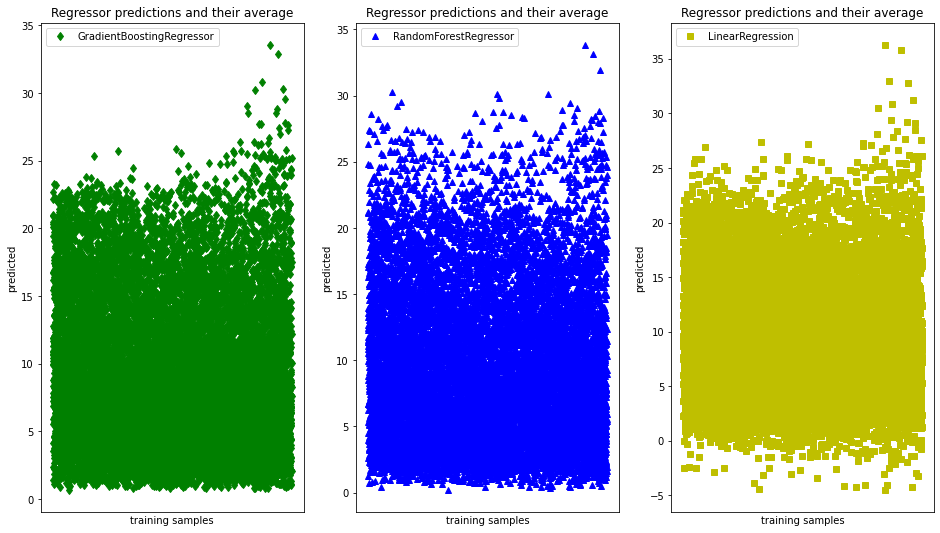

In [75]:
fig, axs = plt.subplots(1,3,figsize=(16,9))

axs[0].plot(GB_pred, "gd", label="GradientBoostingRegressor")
axs[0].tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
axs[0].set_ylabel("predicted")
axs[0].set_xlabel("training samples")
axs[0].legend(loc="best")
axs[0].set_title("Regressor predictions and their average")

axs[1].plot(RF_pred, "b^", label="RandomForestRegressor")
axs[1].tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
axs[1].set_ylabel("predicted")
axs[1].set_xlabel("training samples")
axs[1].legend(loc="best")
axs[1].set_title("Regressor predictions and their average")

axs[2].plot(LR_pred, "ys", label="LinearRegression")
axs[2].tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
axs[2].set_ylabel("predicted")
axs[2].set_xlabel("training samples")
axs[2].legend(loc="best")
axs[2].set_title("Regressor predictions and their average")

plt.show()

## Calculate RMSE values for 3-regressors

In [76]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = []
pred_PTS = pd.DataFrame({'PTS': y,'GB_PTS': GB_pred, 'RF_PTS':RF_pred, 'LR_PTS': LR_pred})
rmse.append(mean_squared_error(pred_PTS['PTS'], pred_PTS['GB_PTS'], squared=False))
rmse.append(mean_squared_error(pred_PTS['PTS'], pred_PTS['RF_PTS'], squared=False))
rmse.append(mean_squared_error(pred_PTS['PTS'], pred_PTS['LR_PTS'], squared=False))
methods = ['GradientBoostingRegressor', 'RandomForestRegressor', 'LinearRegression']
RMSE = pd.DataFrame({'Method': methods,'RMSE': rmse})
RMSE

,Method,RMSE
0,GradientBoostingRegressor,2.430155
1,RandomForestRegressor,0.938909
2,LinearRegression,2.708650


<AxesSubplot:xlabel='Method'>

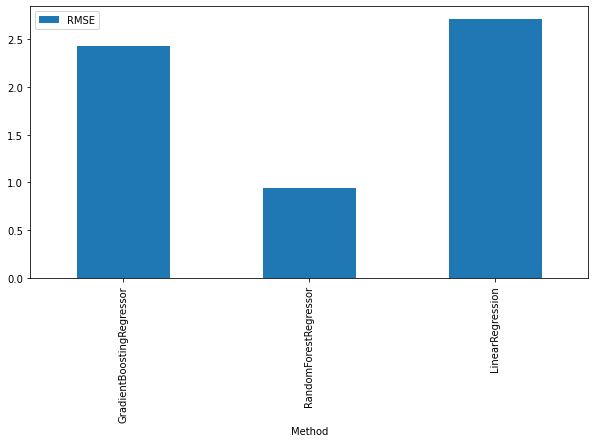

In [77]:
RMSE.plot.bar(x = 'Method', y = 'RMSE', figsize=(10, 5))

*From above table and graph, we can see that Random Forest Regressor is the best. The RMSE of Random Forest Regressor is less than 1.
Now lets predict PTS for all values.*

# Predict the PTS using other features

In [78]:
RF_pred = RF.predict(X)
df_numerical['pred_PTS'] = RF_pred
df_numerical.head(10)

,GS,Age,G,GS,3PA,3P%,2P%,eFG%,TOV,PTS,pred_PTS
0,80.0,31,80.0,80.0,0.2,0.222,0.488,0.485,3.0,14.1,16.328
1,8.0,30,82.0,8.0,0.6,0.212,0.418,0.410,1.8,9.0,8.520
2,82.0,23,82.0,82.0,1.7,0.406,0.481,0.494,3.2,21.3,21.144
3,7.0,29,82.0,7.0,0.5,0.293,0.485,0.482,1.7,11.1,11.069
4,0.0,33,60.0,0.0,0.1,0.167,0.361,0.357,0.6,2.8,2.650
5,79.0,23,79.0,79.0,0.1,0.444,0.541,0.543,2.7,11.4,13.969
6,17.0,28,36.0,17.0,0.0,0.000,0.467,0.466,2.3,13.8,13.604
7,55.0,31,66.0,55.0,0.2,0.083,0.458,0.453,1.6,14.2,12.425
8,80.0,23,80.0,80.0,0.1,0.000,0.526,0.522,2.9,14.7,17.268
9,78.0,29,78.0,78.0,0.3,0.200,0.523,0.520,3.6,26.9,26.310
